In [253]:
import matplotlib.pyplot as plt
import networkx as nx
import time
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import random



In [261]:
### LOAD NETWORKS, PATHWAYS

#Networks
#hem1 network based on keywords
G_hem1 = nx.read_gml ("/Users/Iva/Documents/project/data/disease_networks/G_hem1.gml")
## rw network around HEM1 IN MONSTER
G_hem1_rw = nx.read_gml ("/Users/Iva/Documents/project/data/random_walks_networks/G_hem1_rw.gml")
G_notch1_rw = nx.read_gml ("/Users/Iva/Documents/project/data/random_walks_networks/G_notch1_rw.gml")
G_rictor_rw = nx.read_gml ("/Users/Iva/Documents/project/data/random_walks_networks/G_rictor_rw.gml")
G_monster = nx.read_gml ("/Users/Iva/Documents/project/data/disease_networks/G_monster.gml")

## rw network around all proteins involved in hem1 deficiency according to literature
## extended version with everything 29.3.20201

G_hem1_rw_literature = nx.read_gml ("/Users/Iva/Documents/project/data/random_walks_networks/G_hem1_all_rw.gml")
hem1_literature_proteins = ['3071','60','10006','8936','10787','23191','26999','55845','253260','2475','79109','64223','55615','79899','207']



## sometimes I use nf as comparison
G_nf = nx.read_gml ("/Users/Iva/Documents/project/data/disease_networks/G_nf.gml")
G_nf_rw = nx.read_gml("/Users/Iva/Documents/project/data/HEM1_complete_story/G_nf_rw_annotated.gml")


### opening general pathway data - special

path = "/Users/Iva/Documents/project/data/msigdb_pathways.gmt.txt"
data = open (path)

data_dictionary = {}
l = []
for i in data:
    l.append (i.split())

data_dictionary = {item[0]:item[2:] for item in l}  #dictionary with all pathways


#generally open pathway data

def open_pathway_data(path): #data must be in format path protein1 prot2
    data = open (path)

    data_dictionary = {}
    l = []
    for i in data:
        l.append (i.split())
    data_dictionary = {item[0]:item[2:] for item in l}
    return (data_dictionary)


hem1_pathways = open_pathway_data("/Users/Iva/Documents/project/data/HEM1_complete_story/hem1_pathways.txt")

#save dictionaries as txt files

def save_pathway_data(dictionary, filename):
    import os.path
    path = "/Users/Iva/Documents/project/data/HEM1_complete_story/"
    complete_name = os.path.join (path, filename)
    file = open (complete_name, "w+")
    
    for i,j in dictionary.items():
        list1 = []
        list1.append(i)
        list1.extend(j)
        for k in list1:
            file.write(("%s\t" % k))
        file.write ('\n') 
    file.close()


In [255]:
reactome_dictionary = {}
for i,j in data_dictionary.items():
    if i.find("REACTOME") >= 0:
        a = i.replace ("REACTOME_", "")
        reactome_dictionary[a]=j
reactome_dictionary["NCKAP1L_random_walk"] = list(G_hem1_rw.nodes())
save_pathway_data (reactome_dictionary, "reactome_pathways.txt")
print (len(data_dictionary))
print (len(reactome_dictionary))

2871
1555


In [256]:
#### IN RW NETWORK, COLOR NODES THAT ARE FOUND IN LITERATURE NETWORK

common_hem1 = list(set (G_hem1_rw.nodes()) & set (G_hem1.nodes ()))
specific_hem1_rw = [i for i in list(G_hem1_rw.nodes()) if i not in common_hem1]
specific_hem1 = [i for i in list(G_hem1.nodes()) if i not in common_hem1]



common_nf = list(set (G_nf_rw.nodes()) & set (G_nf.nodes ()))
specific_nf_rw = [i for i in list(G_nf_rw.nodes()) if i not in common_nf]
specific_nf = [i for i in list(G_nf.nodes()) if i not in common_nf]

print (len(common_nf)+len(specific_nf_rw)+len(specific_nf))
print (len(specific_nf_rw))
print (len(common_nf))

print ("_____")
print (len(common_hem1)+len(specific_hem1_rw)+len(specific_hem1))
print (len(specific_hem1_rw))
print (len(common_hem1))





2733
205
171
_____
3297
662
279


In [257]:
for i in list(G_hem1_rw.nodes()):
    print (G_hem1_rw.nodes()[i]["symbol"])

RAN
PSMD2
PPP2R2B
FYN
PACSIN1
CHD3
WASHC1
TLN1
ZNF688
HNRNPH1
ABI1
OBSL1
FAM185A
GOLGA2
AKAP9
RFC1
BAG3
SPTA1
FMNL1
GNB1
PPP3CA
LILRB2
MYBPC2
CHRM2
LRCH1
NCKAP1L
ZNF511
FANCA
RNPS1
BAG6
PRKAA1
TPM1
MYOG
DHX9
DHX15
HSPA8
CNTN1
KDM1A
NCOA3
TRIM28
CCDC102B
WWOX
SFPQ
HSPB1
ENKD1
MAP3K3
RPS3A
PLA1A
OIP5
MYO15B
TRIM3
SRC
NUMB
ZFP90
EFHC2
HNRNPA2B1
KIF2A
RPL7A
SP1
CLUH
RUSC1
YWHAZ
FHL2
PHF8
RNF40
LGALS13
MOB1A
LHX3
RABEP1
SF3B4
ZBED4
SMC3
RPS18
ZUFSP
FAM9C
S100A10
CUL2
ANXA2
TUBB
RAB14
NPM1
HOMER1
PWWP2B
HIF1A
SYN1
DAZAP2
XPO5
MCC
MARK4
EVL
FAM166B
STAT3
NOTCH3
PFN2
LINC00260
FXR2
TERF2
FMR1
FKBPL
HNRNPM
CCT3
TRIM72
SYNPO
PRDM6
SIRT7
HCLS1
KTN1
SOS1
VIM
VDAC2
PARK2
SNAPIN
SNX7
RPS8
CDC73
VDAC1
SLA
CRX
INPPL1
NCKIPSD
KRT31
SNAP23
FBXW7
NHSL2
KIAA1522
VCL
RPS12
PCM1
FLT1
MCM7
NOTCH2
EIF3M
DLGAP2
VHL
MRPL44
100128588
PSEN2
HNRNPU
RND3
PIH1D1
INPP5K
ARHGAP32
DDX39B
ZNF746
EGR4
RASD1
TNPO1
RUNX1
PDS5A
PAK2
POFUT1
MRFAP1L1
ANKRD44
C10orf88
CDK6
PTK2
EEF1B2
THOC6
RBBP4
PCGF1
KNSTRN
CASKIN2
B3GALT4
R

In [258]:
### DISTANCES OF PATHWAYS TO RW OF HEM1

### I ALREADY HAVE FOR NOTCH1, BUT I AM ALSO INTERESTED FOR MTOR

mtor_pathways = {}
notch1_pathways = {}

for i, j in data_dictionary.items():
    if i.find("MTOR")>=0:
        mtor_pathways[i]=j
notch1_pathways = {}

for i, j in data_dictionary.items():
    if i.find("NOTCH1") >= 0:
        notch1_pathways[i] = j


In [259]:
#################       FUNCTIONS        #####################


### ADD COLORING TO NODES IN THE NETWORK

def color_nodes (network, listofnodes, color):    
    for i in listofnodes:
        if (i in list(network.nodes())):  
            network.nodes()[i]["in_literature"] = color

    return (network)

'''
G_hem1_rw = color_nodes(G_hem1_rw, specific_hem1_rw, "rw_specific")
G_hem1_rw = color_nodes(G_hem1_rw, common_hem1, "rw_literature_common")
G_nf_rw = color_nodes(G_nf_rw, specific_nf_rw, "rw_specific")
G_nf_rw = color_nodes(G_nf_rw, common_nf, "rw_literature_common")

'''

## save new networks - annotated with expression and if gene is in keyword search or not
nx.write_gml (G_hem1_rw, "/Users/Iva/Documents/project/data/HEM1_complete_story/hem1_rw_annotated.gml")
nx.write_gml (G_nf_rw, "/Users/Iva/Documents/project/data/HEM1_complete_story/G_nf_rw_annotated.gml")




## add random walker for hem1

mtor_pathways["rw_hem1"] = list(G_hem1_rw.nodes())
notch1_pathways["rw_hem1"] = list(G_hem1_rw.nodes())

save_pathway_data (notch1_pathways, "notch1_pathways")
save_pathway_data (mtor_pathways, "mtor_pathways")

def open_distance_data(path): #data must be in format {path1 path2:distance}
    data = open (path)
    data_dictionary = {}
    l = []
    for i in data:
        l.append (i.split())
    data_dictionary = {str(item[0])+","+str(item[1]):float(item[2]) for item in l}
    return (data_dictionary)


def draw_heatmap(names, distance, heatmapname): #names is list of names of pathways (order importnat!!) and distance is dictionary from Julias script
    matrix = []
    for i in names:
        lista = []
        for j in names:
            if i == j:
                lista.append(0)
                continue
            str1 = str(i)+","+str(j)

            if str1 in list(distance.keys()):
                position = list(distance.keys()).index(str1)
                lista.append(float(list(distance.values())[position]))
                continue
            str2 = str(j)+","+str(i)
            if str2 in list(distance.keys()):
                position = list(distance.keys()).index(str2)
                lista.append(float(list(distance.values())[position]))
                continue
        matrix.append(lista)

    plt.figure(figsize=(14,12))
    ax = sns.heatmap(matrix, xticklabels = names, yticklabels = names)
    ax.set_title (heatmapname, fontsize = 20)
    ax.set_xticklabels(names, fontsize = 15)
    ax.set_yticklabels(names, fontsize = 15)
    return()

 

KeyboardInterrupt: 

In [ ]:
def draw_heatmap(names, distance, heatmapname): #names is list of names of pathways (order importnat!!) and distance is dictionary from Julias script
    matrix = []
    for i in names:
        lista = []
        for j in names:
            if i == j:
                lista.append(0)
                continue
            str1 = str(i)+","+str(j)

            if str1 in list(distance.keys()):
                position = list(distance.keys()).index(str1)
                lista.append(float(list(distance.values())[position]))
                continue
            str2 = str(j)+","+str(i)
            if str2 in list(distance.keys()):
                position = list(distance.keys()).index(str2)
                lista.append(float(list(distance.values())[position]))
                continue
        matrix.append(lista)

    plt.figure(figsize=(14,12))
    ax = sns.heatmap(matrix, xticklabels = names, yticklabels = names)
    ax.set_title (heatmapname, fontsize = 20)
    ax.set_xticklabels(names, fontsize = 22)
    ax.set_yticklabels(names, fontsize = 22)
    return()

()

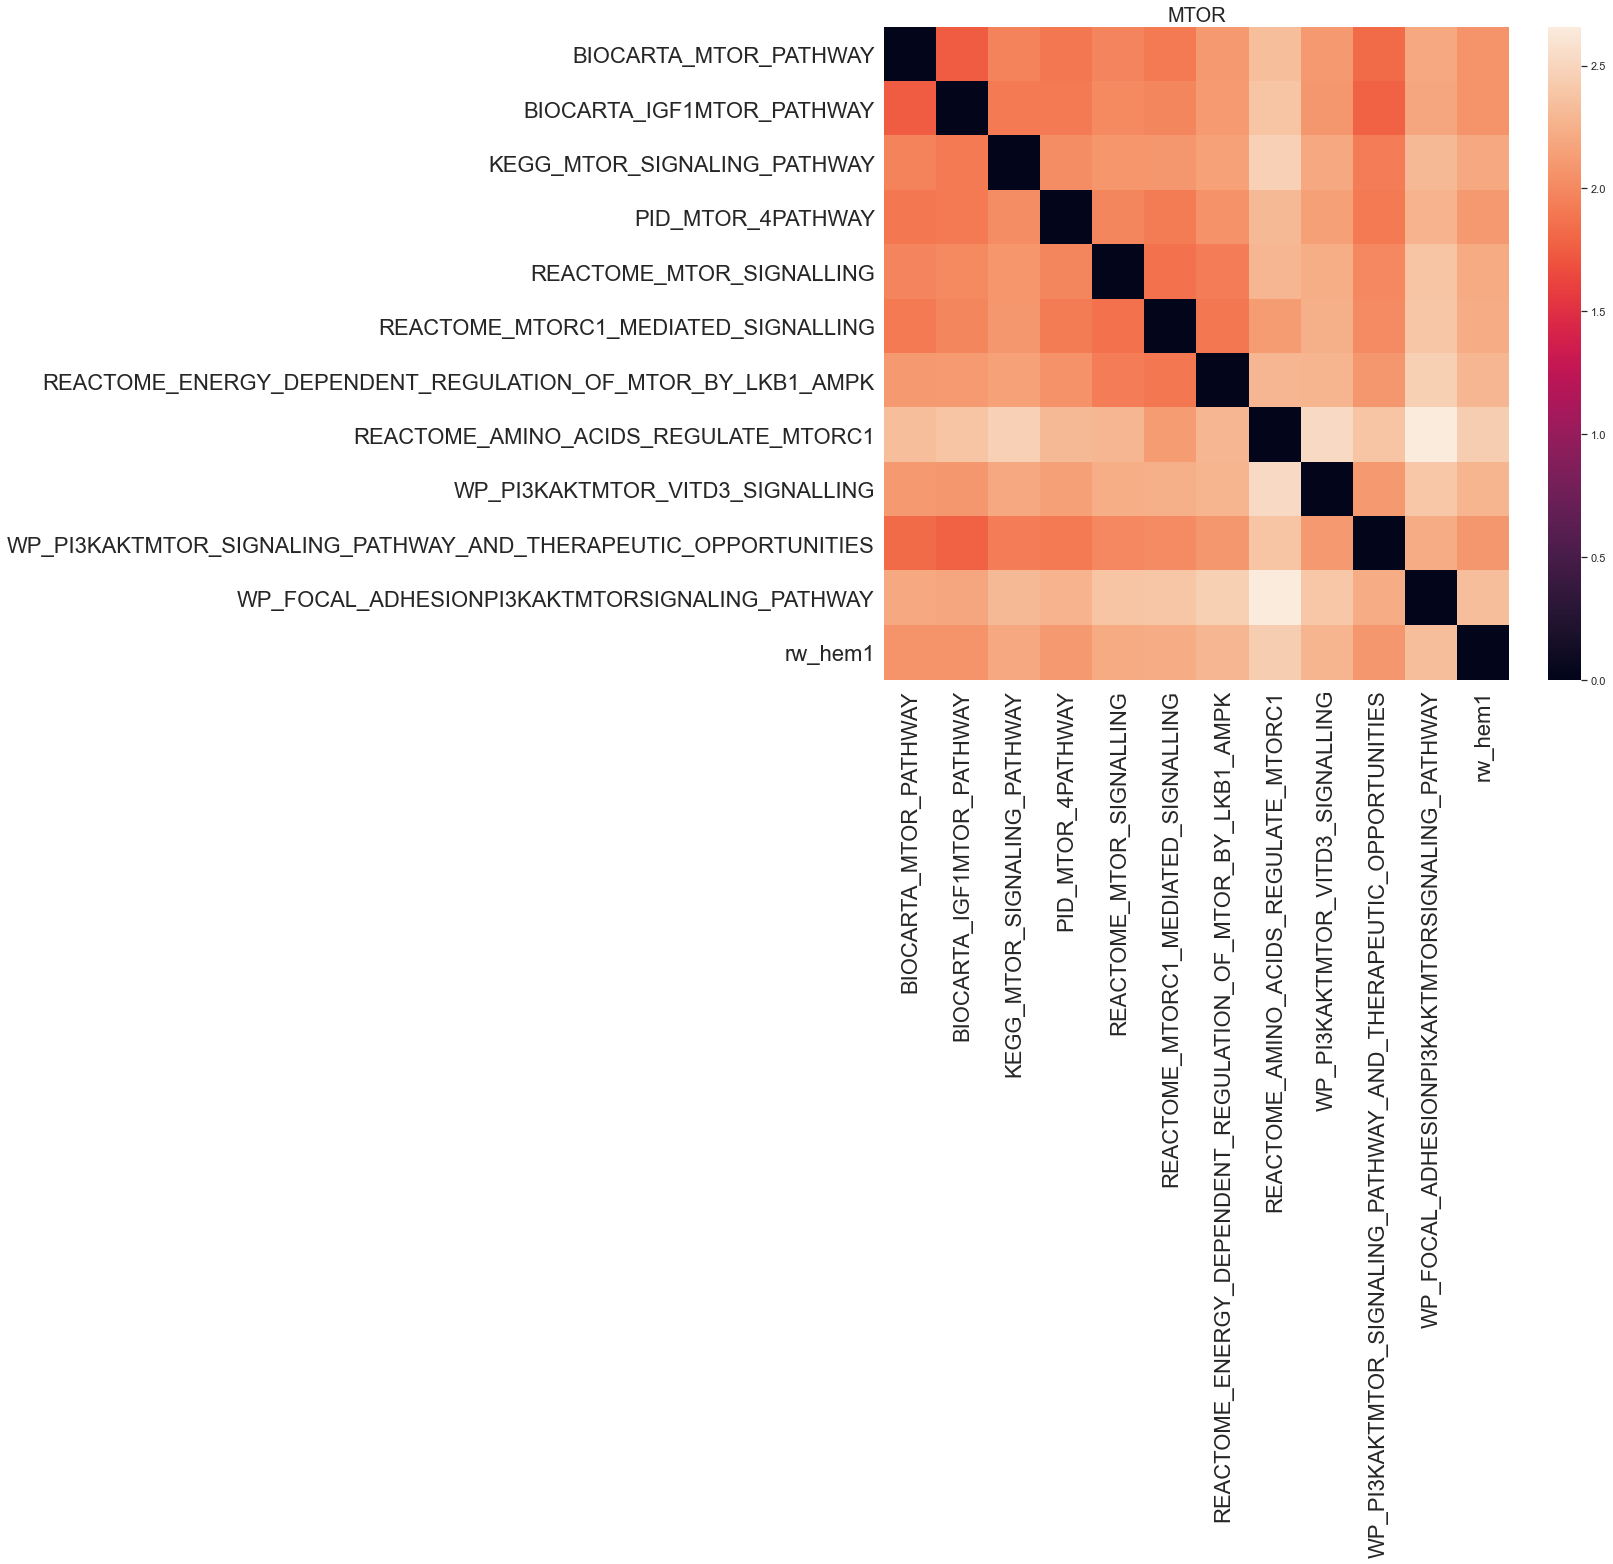

In [10]:
## pathway distances and heatmap  -after we calculated the distance

mtor_distance = open_distance_data("/Users/Iva/Documents/project/data/HEM1_complete_story/mtor_pathway_distance")
mtor_names = list(mtor_pathways.keys())

draw_heatmap(mtor_names, mtor_distance, "MTOR")

In [11]:
### Lets filter both notch and mtor pathways to only REACTOME
### show their distances together on the heatmap - clustering?

mtor_pathways_filtered = {}
notch1_pathways_filtered = {}

for i in list(mtor_pathways.keys()):
    if i.find("REACTOME")>=0:
        a = i.replace("REACTOME_", "")
        mtor_pathways_filtered[a] = mtor_pathways[i]
        
for i in list(notch1_pathways.keys()):
    if i.find("REACTOME")>=0:
        a = i.replace("REACTOME_", "")
        notch1_pathways_filtered[a] = notch1_pathways[i]

merge = {}

for i, j in mtor_pathways_filtered.items():
    merge[i] =j
for i, j in notch1_pathways_filtered.items():
    merge[i] =j

merge["rw_hem1"] = list(G_hem1_rw.nodes())


#'SIGNALING_BY_NOTCH'
#'MTOR_SIGNALLING'
#I will use those two to assess distances
'''
mtor_notch_pathways = {}
mtor_notch_pathways['SIGNALING_BY_NOTCH1'] = notch1_pathways_filtered['SIGNALING_BY_NOTCH1']
mtor_notch_pathways['MTOR_SIGNALLING'] = mtor_pathways_filtered['MTOR_SIGNALLING']
mtor_notch_pathways["rw_hem1"] = list(G_hem1_rw.nodes())
'''
save_pathway_data(merge, "mtor_notch_pathways")


()

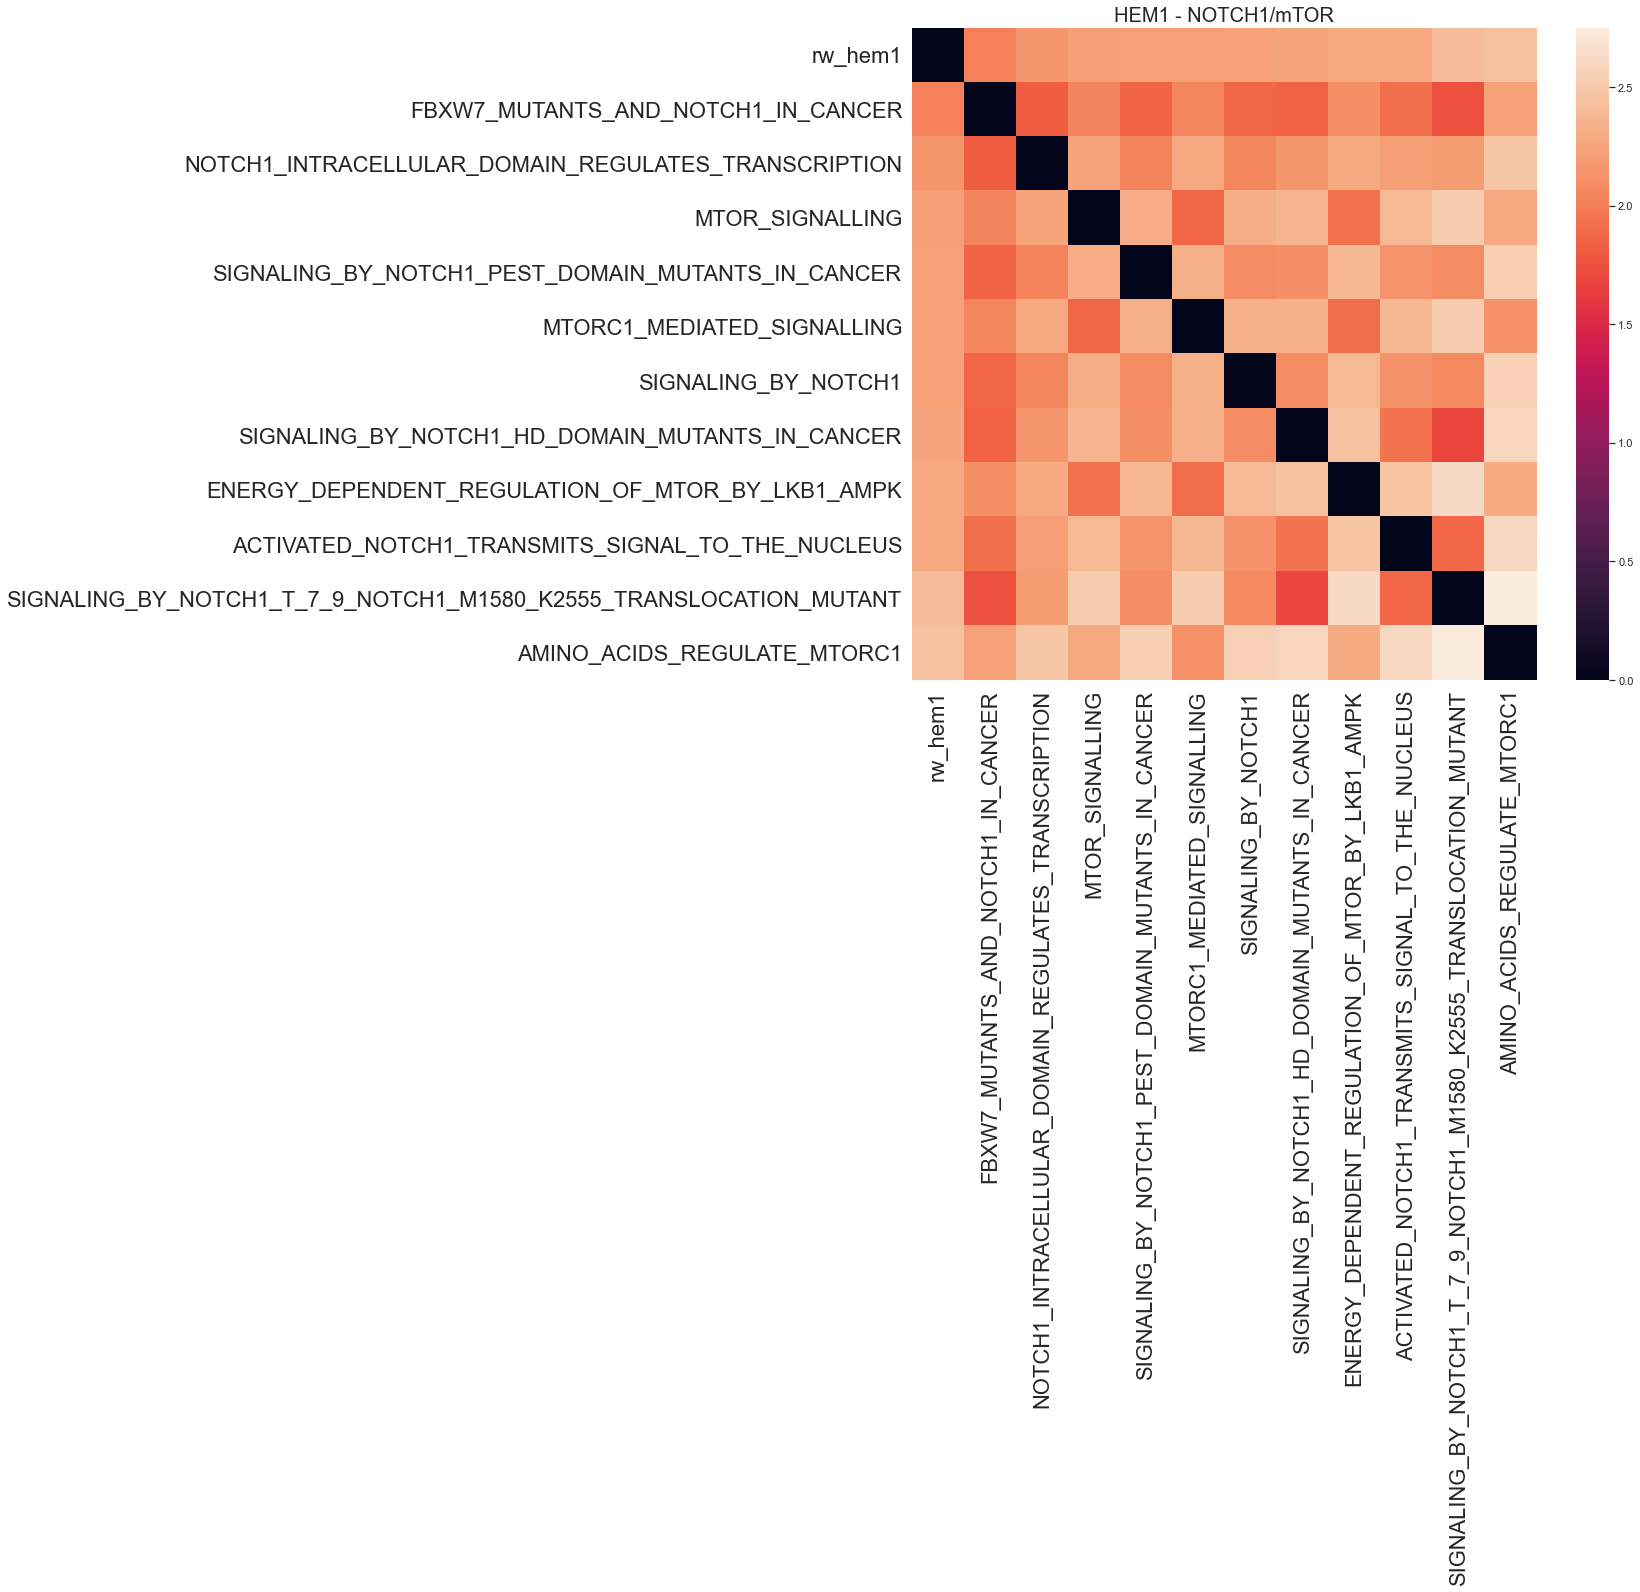

In [12]:
## Heatmap of only pathways with NOTCH1 and mTOR from reactome

distance = open_distance_data("/Users/Iva/Documents/project/data/HEM1_complete_story/mtor_notch_pathway_distance")
hem1_rw_only = {}

for i,j in distance.items():
    if i.find("rw_hem1") >=0:
        a = i.replace("rw_hem1,", "")
        a = a.replace(",rw_hem1", "")
        hem1_rw_only[a] = j
        

#sort all distances from rw  -fisrt the ones that are the closest
import operator
hem1_rw_only = dict (sorted (hem1_rw_only.items(), key = lambda x:float(x[1]), reverse = False))


names = list(hem1_rw_only.keys())
distance = open_distance_data("/Users/Iva/Documents/project/data/HEM1_complete_story/mtor_notch_pathway_distance")
draw_heatmap(list(hem1_rw_only.keys()), distance, "HEM1 - NOTCH1/mTOR")




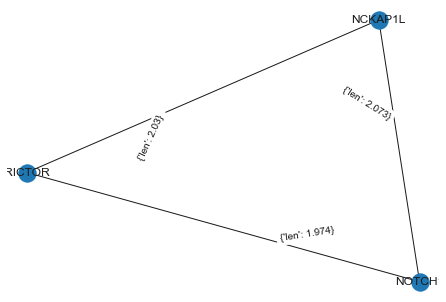

In [13]:
### DISTANCES FROM RW OF HEM1, RICTOR AND NOTCH1

rw_dictionary = {}
rw_dictionary["NCKAP1L"] = list(G_hem1_rw.nodes())
rw_dictionary["NOTCH1"] = list(G_notch1_rw.nodes())
rw_dictionary["RICTOR"] = list(G_rictor_rw.nodes())

save_pathway_data (rw_dictionary, "rw_hem_rictor_notch")


distance = open_distance_data("/Users/Iva/Documents/project/data/HEM1_complete_story/mtor_notch_rw_distance")

#draw_heatmap(rw_dictionary.keys(), distance, "RW")


## add other random walkers

#### make network
G = nx.Graph()
nodes = ["NCKAP1L", "NOTCH1", "RICTOR"]
G.add_nodes_from(nodes)

edges = []

for i,j in distance.items():
    lista = i.split(",")
    lista.extend([round (float(j), 3)])
    edges.append(lista)

for i in edges:
    if i[0] == i[1]:
        continue

    G.add_edge (i[0], i[1], len = i[2])
    
nx.draw (G, with_labels = True)
nx.draw_networkx_edge_labels(G, nx.spring_layout(G))
plt.show()




In [14]:
## color their vs mine hypothesis

G_hem1_expression = nx.read_gml("/Users/Iva/Documents/project/data/HEM1_complete_story/G_hem1_expression_annotated.gml")

## add attributes to edges

G_hem1_expression.add_edge ('3071', '253260', hypothesis="old") ## hem1 interacts with rictor
G_hem1_expression.add_edge ('3071', '4851', hypothesis="new") ##hem1 notch
G_hem1_expression.add_edge ('4851', '3091', hypothesis="new")  ##notch hif1a
G_hem1_expression.add_edge ('3091', '2475', hypothesis="new") ##hif1a rictor
G_hem1_expression.add_edge ('3091', '253260', hypothesis="") ##hif1a rictor

nx.write_gml(G_hem1_expression, "/Users/Iva/Documents/project/data/HEM1_complete_story/G_hem1_hypothesis.gml")

In [251]:
### ENRICHR ANALYSIS ###
#DATE OF DOWNLOAD 12.3.2021.
## AS INPUT I USED RW NEIGHBORHOOD OF HEM1

path_reactome = ("/Users/Iva/Documents/project/data/HEM1_complete_story/Enrichr/Reactome_2016_table.txt")
path_process=("/Users/Iva/Documents/project/data/HEM1_complete_story/Enrichr/GO_Biological_Process_2018_table.txt")
path_function=("/Users/Iva/Documents/project/data/HEM1_complete_story/Enrichr/GO_Molecular_Function_2018_table.txt")
path_kegg=("/Users/Iva/Documents/project/data/HEM1_complete_story/Enrichr/KEGG_2019_Human_table.txt")
path_wiki=("/Users/Iva/Documents/project/data/HEM1_complete_story/Enrichr/WikiPathways_2019_Human_table.txt")
   
def open_enrichr(path): ## makes dictionary
    dictionary = {}
    lista = []
    for i in open(path).readlines():
        lista = i.split("\t")
        dictionary[lista[0]] = lista[1:]
    return(dictionary)

reactome = open_enrichr(path_reactome)
kegg = open_enrichr(path_kegg)
wiki = open_enrichr(path_wiki)
process = open_enrichr(path_process)
function = open_enrichr(path_function)


reactome_sig = [] ##list of pathways that are significantly enriched in hem1 neighborhood
for i in list(reactome.keys()):
    if reactome[i][1] == 'P-value':
        continue
    if float(reactome[i][1]) < 0.05:
        reactome_sig.append(i.upper())
            
for i in reactome_sig:
    if i.find ("NOTCH") >= 0:
        print (i)


LOSS OF FUNCTION OF FBXW7 IN CANCER AND NOTCH1 SIGNALING HOMO SAPIENS R-HSA-2644607
FBXW7 MUTANTS AND NOTCH1 IN CANCER HOMO SAPIENS R-HSA-2644605


In [57]:
### our questions: is NOTCH enriched in rw neighborhood ?
### cound how many times does notch occur in this neighborhood pathways
### we take only pathways that are 'significntly' different 

def is_keyword_enriched (keyword):
    reactome_sig = [] ##list of pathways that are significantly enriched in hem1 neighborhood
    for i in list(reactome.keys()):
        if reactome[i][1] == 'P-value':
            continue
        if float(reactome[i][1]) < 0.05:
            reactome_sig.append(i.upper())

    n_keyword = 0 ##number of occurances in significant pathways 

    for i in reactome_sig:
        if i.find(keyword) >= 0:
            n_keyword += 1
    print ("rectome_sig", len(reactome_sig))
    ### take randomly 746 random pathways from all reactome pathways
    ## only reactome pathways from data_dictionary
    reactome_pathways = []
    for i in list(data_dictionary.keys()):
        if i.find("REACTOME")>=0:
            a = i.upper()
            a = a.replace("_", " ")
            reactome_pathways.append(a)

    ## random sampling
    n_average = [] ## list of numbers of occurances in random samples
    for i in range(10000):
        n = 0
        sample = random.sample(reactome_pathways, len(reactome_sig))
        for i in sample:
            if i.find (keyword) >= 0:
                n += 1
        n_average.append(n) 
    print (n_average[:50])
    frequencies = []
    for i in range(0, max(n_average)):
        frequencies.append(n_average.count(i))
    print (frequencies[:50])
    print (n_keyword)
    plt.bar(range(0, max(n_average)), frequencies)
    plt.bar(n_keyword, height = 500)
            
    a = 'Number of ' + keyword +' occurances'
    plt.ylabel(a, fontsize = 10)
    plt.title(keyword, fontsize = 17)
    return ()
       


In [362]:
## Which processes are enriched in hem1 rw neighborhood?

process_sig = [] ##list of pathways that are significantly enriched in hem1 neighborhood
for i in list(process.keys()):
    if process[i][2] == 'Adjusted P-value':
        continue
    if float(process[i][2]) < 0.05:
        process_sig.append(i.upper())

all_words = []
for i in process_sig:
    a = i.split(" ")
    #a.remove(a[len(a)-1])
    all_words.extend(a)
all_words_nr = list(set(all_words))
all_words_frequencies = {}

for i in all_words_nr:
    all_words_frequencies[i] = all_words.count(i)
all_words_frequencies = dict (sorted (all_words_frequencies.items(), key = lambda x:float(x[1]), reverse = True))
top_words = {}

for i, j in all_words_frequencies.items():
    if j > 4:
        top_words[i] = j


        
top = ['ASSEMBLY','DIFFERENTIATION','ACTIN','METABOLIC','MEMBRANE','FILAMENT','APOPTOTIC',]
top = ["DIFFERENTIATION"]
top_process = []
for i in process_sig:
    for k in top:
        if i.find(k) >= 0:
            top_process.append(i)
'''print (top_process)

for i, j in process.items():
    print (i, j)
    break

for i, j in process.items():
    if i.find ("GO:0045619") >= 0:
        print (i, j)'''
n = 0      
for i, j in process.items():
    print (i, j)
    break
    n+=1
    if n ==1:
        continue
    n+=1
    if i.find("lymphocyte differentiation")>=0 and float(j[1]) < 0.05:
        print (i, j)


for i in top_process:
    print (i)

Term ['Overlap', 'P-value', 'Adjusted P-value', 'Old P-value', 'Old Adjusted P-value', 'Odds Ratio', 'Combined Score', 'Genes\n']
REGULATION OF STEM CELL DIFFERENTIATION (GO:2000736)
REGULATION OF CELL MORPHOGENESIS INVOLVED IN DIFFERENTIATION (GO:0010769)
REGULATION OF HEMATOPOIETIC STEM CELL DIFFERENTIATION (GO:1902036)
REGULATION OF HEMATOPOIETIC PROGENITOR CELL DIFFERENTIATION (GO:1901532)
TYPE B PANCREATIC CELL DIFFERENTIATION (GO:0003309)
REGULATION OF ERYTHROCYTE DIFFERENTIATION (GO:0045646)
NEGATIVE REGULATION OF STEM CELL DIFFERENTIATION (GO:2000737)
WNT SIGNALING PATHWAY INVOLVED IN MIDBRAIN DOPAMINERGIC NEURON DIFFERENTIATION (GO:1904953)
MIDBRAIN DOPAMINERGIC NEURON DIFFERENTIATION (GO:1904948)
REGULATION OF LYMPHOCYTE DIFFERENTIATION (GO:0045619)
REGULATION OF NEURON DIFFERENTIATION (GO:0045664)


rectome_sig 290
[0, 0, 0, 0, 1, 4, 1, 0, 0, 1, 1, 1, 1, 3, 1, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 4, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0]
[2350, 3794, 2594, 993, 230]
3


()

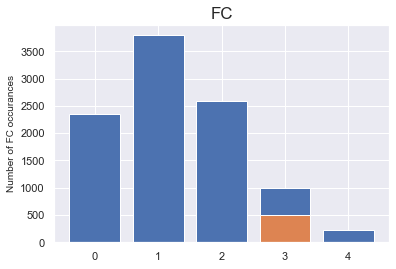

In [247]:
#"ACTIN", 'CELL_MIGRATION', "CYTOSKELETON", "LYMPHOCYTE", "PHAGOCYTOSIS", "IMMUNE_SYSTEM", "IMMUNE_RESPONSE", "MTOR"]
#is_keyword_enriched ("PO")
#is_keyword_enriched ("ACTIN")
#is_keyword_enriched ("RHO GTPASE")
#is_keyword_enriched ("IMMUNE")
#is_keyword_enriched ("RECEPTOR")
is_keyword_enriched ("FC")



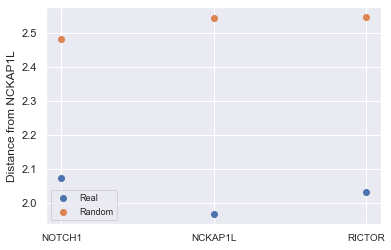

In [191]:
## distance to HEM1 mtor/nckapil

def open_distance_random_data(path): #data must be in format {path1 path2:[distance1, distance2]}
    data = open (path)
    data_dictionary = {}
    l = []
    for i in data:
        a = i.split("\t")
        a[2] = a[2][1: (len(a[2])-1)].split(",")
        a[2][0] = float(a[2][0])
        a[2][1] = float(a[2][1])
        l.append(a)
        data_dictionary[str(a[0])+","+str(a[1])] = a[2]
    
    return (data_dictionary)

distance = open_distance_data("/Users/Iva/Documents/project/data/HEM1_complete_story/hem1_distance_random")
#divide into two lists to plot
distance_hem1 = {} ## only distances from hem1
for i,j in distance.items():
    if i.find("NCKAP1L") >= 0:
        a = i.replace("NCKAP1L", "", 1)
        a = a.replace(",", "")
        distance_hem1[a] = j     

distance_real = []
distance_random = []

for i in list(distance_hem1.values()):
    distance_real.append(i[0])
    distance_random.append(i[1])

plt.rc('xtick', labelsize = 10)
a = plt.scatter(list(distance_hem1.keys()), distance_real)
b = plt.scatter(list(distance_hem1.keys()), distance_random)
plt.ylabel("Distance from NCKAP1L")
plt.legend((a,b), ("Real", "Random"), loc="lower left", fontsize = 9)


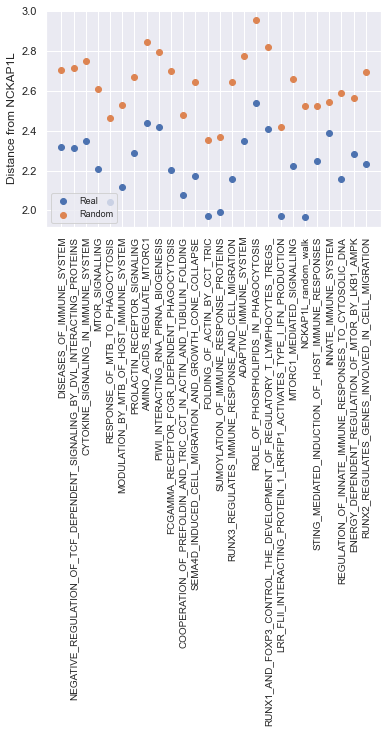

In [172]:
### literature pathways distances with random 

distance = open_distance_data("/Users/Iva/Documents/project/data/HEM1_complete_story/distance_with_random_hem1_pathways_and_rw_literature_only_reactome.txt")
#print (distance)

distance_hem1 = {} ## only distances from hem1
for i,j in distance.items():
    if i.find("NCKAP1L") >= 0:
        a = i.replace("NCKAP1L_random_walk", "", 1)
        a = a.replace(",", "")
        distance_hem1[a] = j     

distance_real = []
distance_random = []

for i in list(distance_hem1.values()):
    distance_real.append(i[0])
    distance_random.append(i[1])

plt.rc('xtick', labelsize = 10)
a = plt.scatter(list(distance_hem1.keys()), distance_real)
b = plt.scatter(list(distance_hem1.keys()), distance_random)
plt.xticks(rotation = 90)
plt.ylabel("Distance from NCKAP1L")
plt.legend((a,b), ("Real", "Random"), loc="lower left", fontsize = 9)



In [279]:
##### normalized

distance_hem1 = {} ## only distances from hem1
for i,j in distance.items():
    if i.find("NCKAP1L") >= 0:
        a = i.replace("NCKAP1L_random_walk", "", 1)
        a = a.replace(",", "")
        distance_hem1[a] = j     

distance_real = []
distance_random = []
distance = []
for i in list(distance_hem1.values()):
    distance.append(i[0]/i[1])



plt.rc('xtick', labelsize = 10)
a = plt.scatter(list(distance_hem1.keys()), distance)
plt.xticks(rotation = 90)
plt.ylabel("Normalized distance from NCKAP1L")



TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [161]:
### plot distances from pathways found with keyword search - only reactome

hem1_literature_pathways = open_pathway_data("/Users/Iva/Documents/project/data/disease_networks/disease_pathways/hem1_pathways.txt")
hem1_only_reactome = {}
for i,j in hem1_literature_pathways.items():
    if i.find("REACTOME") >= 0:
        a = i.replace("REACTOME_", "")
        hem1_only_reactome[a]=j
        

hem1_only_reactome["NCKAP1L_random_walk"] = list(G_hem1_rw.nodes())
print (hem1_only_reactome)
save_pathway_data (hem1_only_reactome, "hem1_pathways_literature_only_reactome.txt")

{'FOLDING_OF_ACTIN_BY_CCT_TRIC': ['10575', '6950', '10693', '10574', '908', '22948', '10694', '7203', '10576'], 'ADAPTIVE_IMMUNE_SYSTEM': ['90293', '996', '26224', '3683', '51666', '9020', '163', '974', '29116', '5689', '9690', '920', '695', '2534', '9902', '7305', '933', '5704', '9604', '23376', '7454', '972', '23304', '57823', '11119', '55236', '25897', '8452', '999', '5685', '1175', '3937', '9820', '3309', '9341', '23327', '5291', '1535', '29945', '8454', '23118', '29927', '64718', '6047', '5476', '53339', '1308', '55176', '5588', '51665', '5525', '26153', '3796', '10235', '23198', '5526', '29121', '4734', '27071', '55658', '998', '5566', '84708', '7321', '2213', '4775', '23291', '8907', '5817', '7879', '113457', '22920', '27252', '55824', '3385', '5909', '5063', '1781', '832', '7319', '3093', '5527', '83737', '51619', '10411', '3835', '1785', '9817', '5788', '79876', '2533', '3693', '3797', '57531', '29992', '10075', '5705', '57542', '6614', '2280', '8655', '51433', '3902', '3383',

2.343552984333708


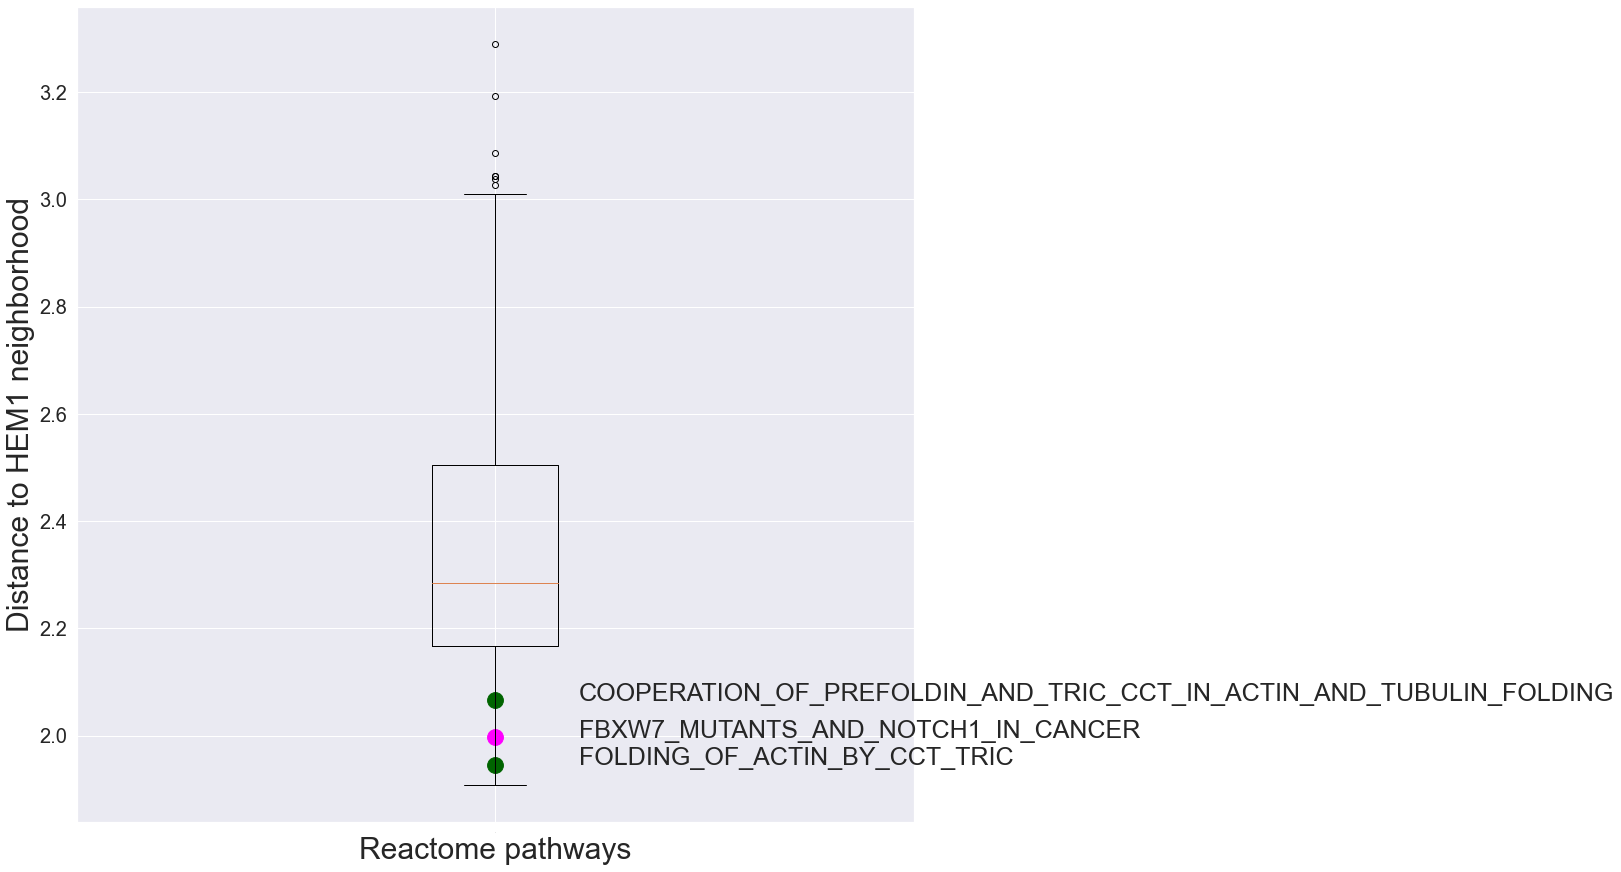

'\nRHO_GTPASES_ACTIVATE_WASPS_AND_WAVES\n\nNCKAP1L_random_walk,SPERM_MOTILITY_AND_TAXES 2.9858156028368796\nNCKAP1L_random_walk,OLFACTORY_SIGNALING_PATHWAY 2.9966294501790602\nNCKAP1L_random_walk,HIGHLY_CALCIUM_PERMEABLE_NICOTINIC_ACETYLCHOLINE_RECEPTORS 3.010047281323877\nVITAMINS,NCKAP1L_random_walk 3.026595744680851\nDEFENSINS,NCKAP1L_random_walk 3.036901595744681\nRELAXIN_RECEPTORS,NCKAP1L_random_walk 3.043218085106383\nFATTY_ACIDS,NCKAP1L_random_walk 3.0440729483282674\nFICOLINS_BIND_TO_REPETITIVE_CARBOHYDRATE_STRUCTURES_ON_THE_TARGET_CELL_SURFACE,NCKAP1L_random_walk 3.0861702127659574\nBETA_DEFENSINS,NCKAP1L_random_walk 3.1928769657724327\n'

In [414]:
##### ALL REACTOME PATHWAYS DISTANCES #####

reactome_distances = open_distance_data("/Users/Iva/Documents/project/data/HEM1_complete_story/all_reactome_pathways_distances")
reactome_distances = dict(sorted(reactome_distances.items(), key=lambda item: item[1]))


n = 0
n_notch = 0
average_distance = 0

for i, j in reactome_distances.items():
    n+=1

    a = i.replace("NCKAP1L_random_walk", "")
    a = a.replace(",", "")
    average_distance += float(j)


 
average_distance = average_distance/len(reactome_distances)
print (average_distance)
a = list(reactome_distances.values())

b = plt.figure(figsize=(15,15))
b = plt.boxplot(list(reactome_distances.values()))
'''
for i in range(len(a)):
    x = random.uniform(0.9, 1.1)
    plt.scatter (x, a[i], color = "lightgreen", alpha = 0.5, s  = 10)
 '''
c = 1
for i, j in reactome_distances.items():
    if i.find ("FBX") >= 0 : # or i.find("DNA_REPLICATION_INITIATION") >= 0:
        b = plt.scatter (1, j, color = "magenta", s = 250)  #FBXW7_MUTANTS_AND_NOTCH1_IN_CANCER
        text = i.replace("NCKAP1L_random_walk", "")
        text = text.replace(",", "")
        b = plt.text(1+ 0.1 , j, text, fontsize=25)
    if i.find("_ACTIN_")>=0:
        b = plt.scatter (1, j, color = "darkgreen", s = 250)  #FBXW7_MUTANTS_AND_NOTCH1_IN_CANCER
        text = i.replace("NCKAP1L_random_walk", "")
        text = text.replace(",", "")
        b = plt.text(1+ 0.1 , j, text, fontsize=25)


'''     
b = plt.scatter (1, 1.9968085106382978, color = "blue")  #FBXW7_MUTANTS_AND_NOTCH1_IN_CANCER
b = plt.scatter (1, 1.9076536643026005, color = "magenta")  #RHO_GTPASES_ACTIVATE_WASPS_AND_WAVES
b = plt.scatter (1, 1.9076536643026005, color = "magenta")  #RHO_GTPASES_ACTIVATE_WASPS_AND_WAVES
'''

b = plt.yticks(fontsize=20)
b = plt.xticks(fontsize = 1)
b = plt.ylabel("Distance to HEM1 neighborhood", fontsize=30)
b = plt.xlabel("Reactome pathways", fontsize=30)
plt.show(b)


'''
RHO_GTPASES_ACTIVATE_WASPS_AND_WAVES

NCKAP1L_random_walk,SPERM_MOTILITY_AND_TAXES 2.9858156028368796
NCKAP1L_random_walk,OLFACTORY_SIGNALING_PATHWAY 2.9966294501790602
NCKAP1L_random_walk,HIGHLY_CALCIUM_PERMEABLE_NICOTINIC_ACETYLCHOLINE_RECEPTORS 3.010047281323877
VITAMINS,NCKAP1L_random_walk 3.026595744680851
DEFENSINS,NCKAP1L_random_walk 3.036901595744681
RELAXIN_RECEPTORS,NCKAP1L_random_walk 3.043218085106383
FATTY_ACIDS,NCKAP1L_random_walk 3.0440729483282674
FICOLINS_BIND_TO_REPETITIVE_CARBOHYDRATE_STRUCTURES_ON_THE_TARGET_CELL_SURFACE,NCKAP1L_random_walk 3.0861702127659574
BETA_DEFENSINS,NCKAP1L_random_walk 3.1928769657724327
'''

In [276]:
for i in list(nx.neighbors(G_monster, "2308")):
    print (i)
        
        


6714
2274
51701
5566
4193
207
2099
2932
1017
5058
4691
10971
23371
10128
7534
6789
10533
6597
7514
2810
23411
1026
7532
1499
4089
3484
4088
8503
1523
9784
3172
6418
142
10273
367
1452
983
891
6304
2931
472
1387
51547
9643
2033
7249
5925
5914
5468
8648
7068
5965
208
6446
10000
5371
1051
3661
2492
1407
1749
23234
64326
6502
3202
5307
5166
1602
1859
3206
23314
10110
80854
2290
53944
2538
3207
4485
4303
7296
22933
100132074
3239
2310
2308
3229
57291
